**Importing the necessary liabraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Iris.csv")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


**Exploring the Dataset**

In [3]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Data Preprocessing -To convert categorrical values**


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
LE=LabelEncoder()
df.iloc[:,-1]=LE.fit_transform(df.iloc[:,-1])
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


**Spliting Data Into Independent and Dependent **

In [6]:
x=df.iloc[:,:-1]
x.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [7]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Iris-setosa, dtype: int32

**Spliting The Dataset into Train and Test split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [10]:
X_train.head()

,5.1,3.5,1.4,0.2
112,5.7,2.5,5.0,2.0
72,6.1,2.8,4.7,1.2
34,5.0,3.2,1.2,0.2
21,4.6,3.6,1.0,0.2
3,5.0,3.6,1.4,0.2


In [11]:
X_train.shape

(119, 4)

In [12]:
y_train.shape

(119,)

**Model Building(DT)**

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier()

In [15]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

**Comparision Between Actual & Predicted Output**

In [16]:
y_pred=dt.predict(X_test)

In [17]:
y_pred

array([1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 1])

In [18]:
y_test=np.array(y_test)
y_test

array([1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 1])

**Accuracy of DT Model**

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_pred,y_test)

1.0

**Conffusion Matrics for DT model**

In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
confusion_matrix(y_pred,y_test)

array([[ 6,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 11]], dtype=int64)

The confusion maatrix shows the way in which youclassifiaction maodel is confused when it makes predictions

**Classification Report of DT model**

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**DT Model visulization**

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt 

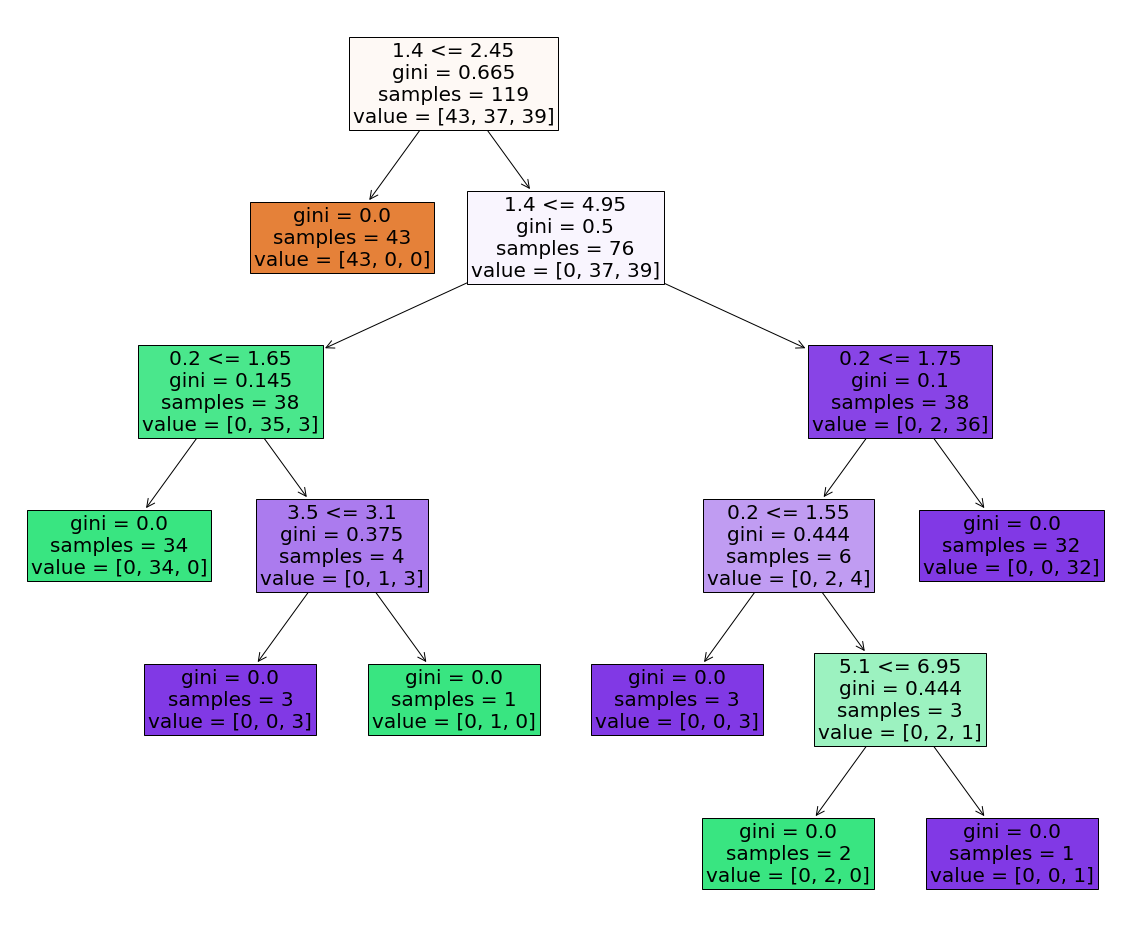

In [26]:
plt.figure(figsize=(20,17))
dtviz=tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=20)